<a href="https://colab.research.google.com/github/sharingplay/Cubo-Rubik-grafico/blob/master/Lab1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio 1

In [28]:
# import libraries
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt #for plotting
import torch
import numpy as np
import math
import pandas as pd
from IPython.display import HTML


In [16]:
x = [1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29] #heights
y = [32,33,34,30,32,35,34,32,32,35,33,35,34,30,33,34,35,32,33,33,33,34,34,31,32,34,34,31,35,34] #weights
x_data = torch.tensor(x, dtype=torch.float64)
y_data = torch.tensor(y, dtype=torch.float64)

#### Opcional

In [4]:
N_SAMPLES = 100000 #number of samples
N_FEATURES = 1 #number of features
N_INFORMATIVE = 1 #number of useful features
NOISE = 10 #bias and standard deviation of the guassian noise
x, y, coef = make_regression(n_samples=N_SAMPLES,
                            n_features=N_FEATURES,
                            n_informative=N_INFORMATIVE, 
                            noise=NOISE,
                            coef=True, # return the coefficients of the underlying linear model
                            random_state=0) #set for same data points for each run

# Scale feature x (students' height) to range [1.20, 1.40]
x = np.interp(x, (x.min(), x.max()), (1.20, 1.40))
x_t = np.transpose(x)[0]
x_data = torch.tensor(x_t, dtype=torch.float64)

# Scale target y (students' weight) to range [25,40] 
y = np.interp(y, (y.min(), y.max()), (25, 40))
y_data = torch.tensor(y, dtype=torch.float64)


### Ejercicio 2

In [7]:
def linearRegression (array_X,array_Y):
  #x and y average
  x_avg = torch.mean(array_X)
  y_avg = torch.mean(array_Y)

  #data needed to calculate b and a
  xi_xm = torch.add(array_X, -(x_avg))
  yi_ym = torch.add(array_Y, -(y_avg))

  num = torch.mul(xi_xm,yi_ym)
  den = torch.pow(xi_xm,2)

  num_sum = torch.sum(num)
  den_sum = torch.sum(den)

  #Linear regression y = a + bx
  #b calculation
  b = num_sum / den_sum
  #a calculation
  a = y_avg - (b*x_avg)
  
  return (a,b)

a, b = linearRegression(x_data, y_data)
print(f'a = {a}')
print(f'b = {b}')

a = -17.71417445482861
b = 40.264797507788124


### Ejercicio 3



#### a. Explicación del cálculo y la fórmula

El **coeficiente de Pearson** o coeficiente de correlación lineal es una medida estadística usada para determinar la relación entre dos variables estudiadas.

Para calcular el coeficiente de correlación de Pearson entre dos variables, se debe *dividir la covarianza de dichas variables por la raíz cuadrada del producto de sus varianzas*; es decir:

\\
\begin{align}
\rho = \frac{cov(x,y)}{\sqrt{var(x) \cdot var(y)}},
\end{align}

\\

donde, las funciones de covarianza **cov** y varianza **var** se definen como:

\begin{align}
  cov(x,y)=\frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}\\
\end{align}

\begin{align}
  var(x)=\frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2}{n-1}\\
\end{align}

\begin{align}
  var(y)=\frac{\sum\limits_{i=1}^{n} (y_i - \bar{y})^2}{n-1}\\
\end{align}

\\
El coeficiente de correlación de Pearson trata de cuantificar la dependencia lineal entre dos variables aleatorias cuantitativas. Valorar numéricamente la correlación entre dos variables es complicado porque resulta difícil determinar qué pareja de variables está más correlacionada entre sí, así pues, el objetivo de coeficiente de correlación de Pearson es dar un valor a la relación entre variables para luego poder comparar entre ellas.













#### b. Desarrollo del cálculo para el set de datos

In [ ]:
def getPearsonCoeff(x : torch.Tensor, y: torch.Tensor) -> float:
  variables = torch.tensor([x.tolist(), y.tolist()])
  covariance_matrix = torch.cov(variables)
  covariance = covariance_matrix[0][1]
  variance_x = covariance_matrix[0][0]
  variance_y = covariance_matrix[1][1]
  rho = covariance / math.sqrt(variance_x*variance_y)
  return rho.tolist()

r = getPearsonCoeff(x_data, y_data)
print(f'r = {r}')

r = 0.8281876444816589


#### c. Comprobación de linealidad

Se sabe que el valor del coeficiente de Pearson estará siempre dentro del rango $[-1,1]$. Dependiendo del valor que tenga el coeficiente, este se puede interpretar de diferentes formas:


1.   $\rho = -1$ : las dos variables tienen una correlación negativa perfecta. Es decir, se puede trazar una recta con pendiente negativa que toque todos los puntos.

2.   $-1<\rho<0$: la correlación entre las dos variables es negativa, por lo tanto, cuando una variable aumenta, la otra disminuye. Cuanto más cerca esté del valor de -1, mayor es la relación negativa entre las variables.

3. $\rho=0$: la relación lineal entre las variables es nula. Esto no quiere decir que las variables sean independientes, ya que pueden tener una relación no lineal entre ellas.

4. $0<\rho<1$: la correlación entre las dos variables es positiva, por lo que una variable tiende a aumentar su valor cuando la otra también se incremente. Cuando más cerca esté el valor de 1, mayor será la relación entre ellas.

5. $\rho = -1$ : las dos variables tienen una correlación positiva perfecta, es decir, tienen una relación lineal positiva.

\\
De esta forma, para el caso del set de datos de la presentación vista en clase, el coeficiente de correlación lineal es aproximadamente de $0,8282$. Este valor es cercano a 1, lo que indica que la correlación entre las variables de estatura y el peso de los estudiantes es positiva. Por lo tanto, la tendencia es que si la variable de estatura aumenta, la del peso también lo hará.




### Ejercicio 4

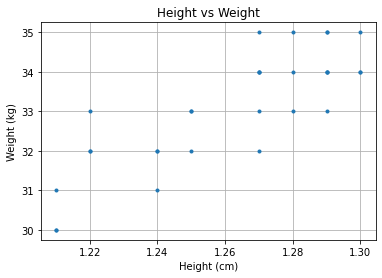

In [ ]:
def plotData(x: list, y: list, xLabel: str, xUnits: str, yLabel: str, yUnits: str):
  # Plotting data
  plt.ion() #interactive plot on
  plt.plot(x,y,'.',label='observations')
  plt.xlabel(f'{xLabel} ({xUnits})');plt.ylabel(f'{yLabel} ({yUnits})')
  plt.grid()
  plt.title(f'{xLabel} vs {yLabel}')

plotData(x,y,'Height', 'cm', 'Weight', 'kg')

### Ejercicio 5

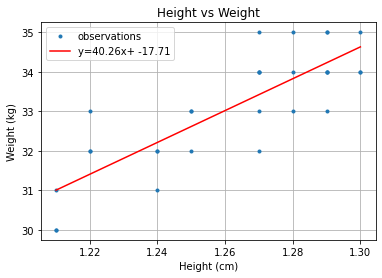

In [ ]:
def plotDataLinearReg(x: list, y: list, xLabel: str, xUnits: str, yLabel: str, yUnits: str, a: torch.Tensor, b: torch.Tensor):
  # Plotting data
  plt.ion() #interactive plot on
  plt.plot(x,y,'.',label='observations')
  min_x = np.min(x)
  max_x = np.max(x)
  x = np.linspace(min_x,max_x,100)
  y = a + b*x
  plt.plot(x, y, '-r', label=('y=%.2fx+ %.2f' % (b,a)))
  plt.xlabel(f'{xLabel} ({xUnits})');plt.ylabel(f'{yLabel} ({yUnits})')
  plt.legend(loc='upper left')
  plt.grid()
  plt.title(f'{xLabel} vs {yLabel}')

plotDataLinearReg(x,y,'Height', 'cm', 'Weight', 'kg', a, b)

### Ejercicio 6

In [32]:
#First 6 values appear in the first exercise, the rest are different values in a range from 1.16 to 1.34
x = [1.25,1.28,1.27,1.21,1.22,1.29,1.24,1.26,1.23,1.24,1.30,1.31,1.20,1.19,1.18,1.32,1.33,1.17,1.16,1.34]
x_data = torch.tensor(x, dtype=torch.float64)
#We use the 'a' and 'b' obtained in exercise 1 for the initial data
a = -17.71417445482861
b = 40.264797507788124
#Using linear regression to preddict the 'y' results
y = torch.mul(x_data,b)
y = torch.add(y,a)

#Creating the table to display data with pandas library
y = np.array(y.tolist())
datos = np.stack((x,y),axis = -1) #unifiying both arrays into one
df = pd.DataFrame(data = datos, columns = ['Alturas (m)','Predicciones de pesos (kg)'])
display(df)

#changing colors of the data frame
def formatear_fila(row):
    html = '<tr>'
    for col in row.index:
        valor = row[col]
        html += f'<td>{valor}</td>'
    html += '</tr>'
    return html

# Generate HTML table
html = '<table>'
html += '<tr><th>Alturas (m)</th><th>Predicciones de pesos (kg)</th></tr>'
for i, row in df.iterrows():
    if i < 6:
        html += '<tr style="background-color: #37DCE4;">'
    else:
        html += '<tr>'
    html += formatear_fila(row)
    html += '</tr>'
html += '</table>'

# Mostrar la tabla en el notebook
display(HTML(html))


,Alturas (m),Predicciones de pesos (kg)
0,1.25,32.616822
1,1.28,33.824766
2,1.27,33.422118
3,1.21,31.006231
4,1.22,31.408879
5,1.29,34.227414
6,1.24,32.214174
7,1.26,33.019470
8,1.23,31.811526
9,1.24,32.214174


Alturas (m),Predicciones de pesos (kg)
1.25,32.61682242990655
1.28,33.82476635514019
1.27,33.42211838006231
1.21,31.006230529595022
1.22,31.4088785046729
1.29,34.227414330218075
1.24,32.214174454828665
1.26,33.01947040498443
1.23,31.811526479750782
1.24,32.214174454828665
